Training SVM...

[SVM Validation Results]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.08      0.15      1168
           1       0.67      0.16      0.26      1044
           2       0.34      0.95      0.50      1710
           3       0.47      0.09      0.16       404
           4       0.50      0.08      0.14       980
           5       0.58      0.23      0.32       248

    accuracy                           0.37      5554
   macro avg       0.53      0.27      0.26      5554
weighted avg       0.51      0.37      0.29      5554



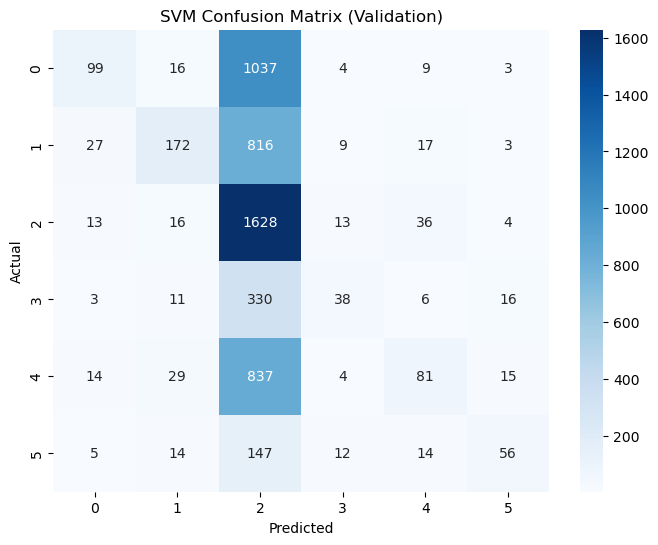

Training Random Forest...

[Random Forest Validation Results]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.05      0.10      1168
           1       0.21      0.93      0.35      1044
           2       0.74      0.29      0.42      1710
           3       0.59      0.08      0.15       404
           4       0.49      0.05      0.09       980
           5       0.59      0.29      0.39       248

    accuracy                           0.30      5554
   macro avg       0.54      0.28      0.25      5554
weighted avg       0.55      0.30      0.26      5554



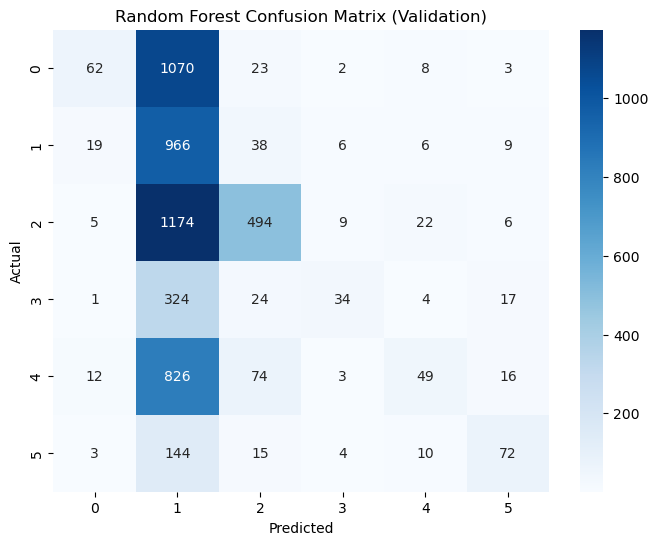

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
train_data = pd.read_csv("traindata.csv")
test_data = pd.read_csv("testdata_with_predictions3.csv")
test_data.rename(columns={'content': 'comment'}, inplace=True)

# 划分训练集和验证集
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    train_data['comment'], train_data['label'], test_size=0.2, random_state=42
)
X_train_raw = X_train_raw.fillna("")
X_val_raw = X_val_raw.fillna("")
test_data['comment'] = test_data['comment'].fillna("")

# 文本向量化
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_val = vectorizer.transform(X_val_raw)
X_test = vectorizer.transform(test_data['comment'])

# --------------------- SVM ---------------------
print("Training SVM...")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 验证集预测 (SVM)
y_val_pred_svm = svm_model.predict(X_val)

# 可视化 SVM 混淆矩阵
print("\n[SVM Validation Results]")
print("Classification Report:\n", classification_report(y_val, y_val_pred_svm))
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------- Random Forest ---------------------
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 验证集预测 (RF)
y_val_pred_rf = rf_model.predict(X_val)

# 可视化 RF 混淆矩阵
print("\n[Random Forest Validation Results]")
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf))
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------- Test Data Prediction ---------------------
# 在测试集上进行预测
test_data['SVMlabel'] = svm_model.predict(X_test)
test_data['RFlabel'] = rf_model.predict(X_test)

# 保存结果
test_data.to_csv("testdata_with_predictions4.csv", index=False)



In [2]:
test_data

,文件夹,文件名,comment,nofreeze_label,half_freeze_label,freeze_label,SVMlabel,RFlabel
0,1029,15.txt,激动,1,1,0,2,1
1,1029,15.txt,#从神五到神十九#,0,0,0,2,1
2,1029,15.txt,#神十九出征仪式#,1,0,0,2,1
3,1029,15.txt,#中国空间站我们90后来了#,1,1,1,2,1
4,1029,15.txt,#神十九航天员的出征仪式好可爱#,1,1,1,2,1
...,...,...,...,...,...,...,...,...
36014,1109,30.txt,[好运连连],1,1,0,2,1
36015,1109,30.txt,这次又是什么原因……怎么感觉它三天两头崩一次,4,4,2,2,1
36016,1109,30.txt,谁给我指个路、、又谁在被保护,2,2,2,2,1
36017,1109,30.txt,怎么又崩了？干啥了,2,3,2,2,1
